In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
data = pd.read_csv('Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv')

In [21]:
cleaned_data = data.dropna()

In [22]:
cleaned_data = cleaned_data[~cleaned_data['CFR_Harian'].str.contains('#DIV/0!', na=False)]
cleaned_data = cleaned_data[~cleaned_data['RI_Harian'].str.contains('#DIV/0!', na=False)]

In [23]:
columns_to_convert = [
    'Kasus_Terkonfirmasi_Akumulatif',
    'Penambahan_Harian_Kasus_Terkonf',
    'Kasus_Sembuh_Akumulatif',
    'Penambahan_Harian_Kasus_Sembuh',
    'Kasus_Meninggal_Akumulatif',
    'Kasus_Aktif_Akumulatif',
    'CFR_Harian',
    'RI_Harian'
]

for col in columns_to_convert:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

In [24]:
grouped_data = cleaned_data.groupby('Provinsi')[columns_to_convert].mean()

In [25]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(grouped_data)

In [26]:
# Clustering dengan K-Means
cluster_options = [3, 4, 5, 6, 7]
clustering_results = {}

for n_clusters in cluster_options:
    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Evaluasi menggunakan silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    clustering_results[n_clusters] = {
        "model": kmeans,
        "labels": cluster_labels,
        "silhouette_score": silhouette_avg,
    }

In [27]:
best_cluster = max(clustering_results, key=lambda k: clustering_results[k]["silhouette_score"])
best_result = clustering_results[best_cluster]

In [28]:
print(f"Jumlah cluster terbaik: {best_cluster}")
print(f"Silhouette Score: {best_result['silhouette_score']}")

Jumlah cluster terbaik: 3
Silhouette Score: 0.5126797611148279


In [29]:
grouped_data['Cluster'] = best_result['labels']

In [30]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

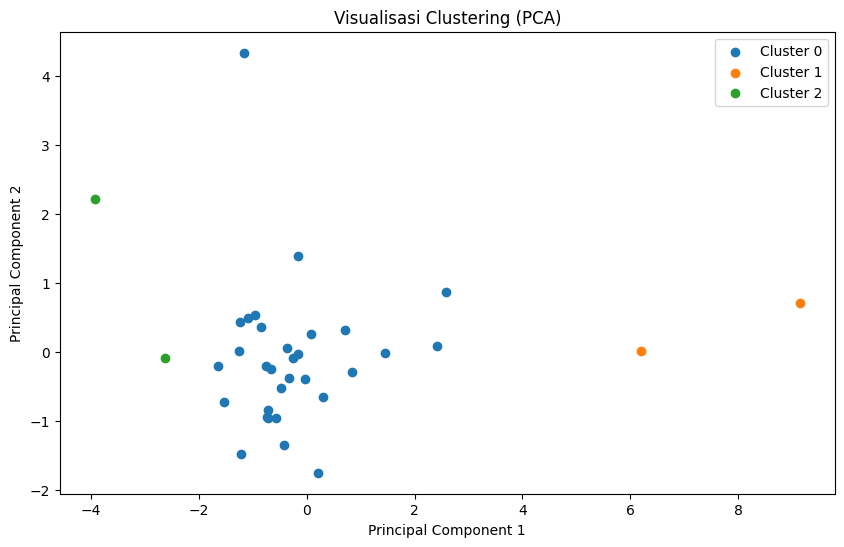

In [31]:
# Scatter plot
plt.figure(figsize=(10, 6))
for cluster_id in range(best_cluster):
    cluster_points = reduced_data[best_result["labels"] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")

plt.title("Visualisasi Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [32]:
print(grouped_data.reset_index()[['Provinsi', 'Cluster']])

                      Provinsi  Cluster
0                         Aceh        0
1                         Bali        0
2                       Banten        0
3                     Bengkulu        0
4                  DKI Jakarta        1
5   Daerah Istimewa Yogyakarta        0
6                    Gorontalo        0
7                    Indonesia        0
8                        Jambi        2
9                   Jawa Barat        0
10                 Jawa Tengah        0
11                  Jawa Timur        1
12            Kalimantan Barat        2
13          Kalimantan Selatan        0
14           Kalimantan Tengah        0
15            Kalimantan Timur        0
16            Kalimantan Utara        0
17   Kepulauan Bangka Belitung        0
18              Kepulauan Riau        0
19                     Lampung        0
20                      Maluku        0
21                Maluku Utara        0
22         Nusa Tenggara Barat        0
23         Nusa Tenggara Timur        0
